<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/ABINIT_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [2]:
!conda --version

conda 23.11.0


In [3]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [6]:
!conda install pandas numpy matplotlib abinit abipy --quiet

Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - abinit
    - abipy
    - matplotlib
    - numpy
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abipy-0.9.7                |     pyhd8ed1ab_0        11.7 MB  conda-forge
    apscheduler-3.10.4         |     pyhd8ed1ab_0          45 KB  conda-forge
    asttokens-2.4.1            |     pyhd8ed1ab_0          28 KB  conda-forge
    cftime-1.6.3               |  py310h1f7b6fc_0         241 KB  conda-forge
    chart-studio-1.1.0         |     pyh9f0ad1d_0          51 KB  conda-forge
    click-8.1.7                |unix_pyh707e725_0          82 KB  conda-forge
    decorator-5.1.1            |     pyhd8ed1ab_0          12 KB  conda-forge
    exceptiongroup-1.2.0       |     pyhd8ed1ab_2          20 KB  conda-for

In [31]:
#https://abinit.github.io/abipy_book/base1/lesson_base1.html

In [8]:
!abinit -h

 -v, --version              Show version number and exit.
 -b, --build                Show build parameters and exit.
 -d, --dry-run              Validate input file and exit.
 -j, --omp-num-threads      Set the number of OpenMp threads.
 --use-xgemm3m[=yesno]      Use ZGEMM3M routines instead of ZGEMM. Default: no 
 --use-mpi-in-place[=yesno] Enable/disable usage of MPI_IN_PLACE in e.g. xmpi_sum. Default: no
                            Note that some MPI libs e.g. intel-mpi may not implement this feature
                            correctly so it is adviced to test this option with e.g. structural
                            relaxations before running production calculations.
 --ipi                      Activate socket-driven calculation using i-pi protocol.
                            For UNIX socket, use: --ipi {unixsocket}:UNIX
                            For INET socket, use  --ipi {host}:{port}. Usage example:
                            `abinit run.abi --ipi {unixsocket}:UNIX >

In [7]:
# pip install abipy

In [11]:
# pip install pymatgen

In [10]:
# pip install pydantic==1.8

In [21]:
# Use this at the beginning of your script so that your code will be compatible with python3
from __future__ import print_function, division, unicode_literals

import numpy as np

import warnings
warnings.filterwarnings("ignore")  # Ignore warnings

from abipy import abilab
abilab.enable_notebook() # This line tells AbiPy we are running inside a notebook

# This line configures matplotlib to show figures embedded in the notebook.
# Replace `inline` with `notebook` in classic notebook
%matplotlib inline

# Option available in jupyterlab. See https://github.com/matplotlib/jupyter-matplotlib
#%matplotlib widget

abilab.print_source(gs_input)
def gs_input(x=0.7, ecut=10, acell=(10, 10, 10)):
    """
    This function builds an AbinitInput object to compute the total energy
    of the H2 molecule in a big box.

    Args:
        x: Position of the first Hydrogen along the x-axis in Cartesian coordinates.
           The second Hydrogen is located at [-x, 0, 0]
        ecut: Cutoff energy in Ha.
        acell: Lengths of the primitive vectors (in Bohr)

    Returns:
        AbinitInput object.
    """
    # Build structure from dictionary with input variables.
    structure = abilab.Structure.from_abivars(
        ntypat=1,                           # There is only one type of atom.
        znucl=1,                            # Atomic numbers of the type(s) of atom.
        natom=2,                            # There are two atoms.
        typat=(1, 1),                       # They both are of type 1, that is, Hydrogen.
        xcart=[-x, 0.0, 0.0,                # Cartesian coordinates of atom 1, in Bohr.
               +x, 0.0, 0.0],               # second atom.
        acell=acell,                        # Lengths of the primitive vectors (in Bohr).
        rprim=[1, 0, 0, 0, 1, 0, 0, 0, 1]   # Orthogonal primitive vectors (default).
    )

    # Build AbinitInput from structure and pseudo(s) taken from AbiPy package.
    inp = abilab.AbinitInput(structure=structure, pseudos=abidata.pseudos("01h.pspgth"))

    # Set value of other variables.
    inp.set_vars(
        ecut=ecut,
        nband=1,
        diemac=2.0,
        toldfe=1e-6,
        prtwf=-1,
        iomode=3
    )

    # Define k-point sampling.
    inp.set_kmesh(ngkpt=(1, 1, 1), shiftk=(0, 0, 0))

    return inp

In [22]:
gsinp = gs_input()
print("The value of ecut is:", gsinp["ecut"])

The value of ecut is: 10


In [23]:
gsinp

<AbinitInput at 132492667486016>

In [24]:
print(gsinp.structure)
print("The big box volume is:", gsinp.structure.volume)

Full Formula (H2)
Reduced Formula: H2
abc   :   5.291772   5.291772   5.291772
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (2)
  #  SP        a    b    c
---  ----  -----  ---  ---
  0  H     -0.07    0    0
  1  H      0.07    0    0
The big box volume is: 148.18471147216275


In [26]:
print(gsinp.pseudos[0])

<NcAbinitPseudo: 01h.pspgth>
  summary: Goedecker-Teter-Hutter  Wed May  8 14:27:44 EDT 1996
  number of valence electrons: 1.0
  maximum angular momentum: s
  angular momentum for local part: s
  XC correlation: LDA_XC_TETER93
  supports spin-orbit: False
  radius for non-linear core correction: 0.0
  hint for low accuracy: ecut: 0.0, pawecutdg: 0.0
  hint for normal accuracy: ecut: 0.0, pawecutdg: 0.0
  hint for high accuracy: ecut: 0.0, pawecutdg: 0.0


In [32]:
!wget https://raw.githubusercontent.com/abinit/abitutorials/2943e0204207cfe31dadb85ea7f992a14417540d/managers/manager.yml

--2024-03-22 05:13:39--  https://raw.githubusercontent.com/abinit/abitutorials/2943e0204207cfe31dadb85ea7f992a14417540d/managers/manager.yml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 442 [text/plain]
Saving to: ‘manager.yml’

manager.yml         100%[===================>]     442  --.-KB/s    in 0s      

2024-03-22 05:13:39 (27.1 MB/s) - ‘manager.yml’ saved [442/442]



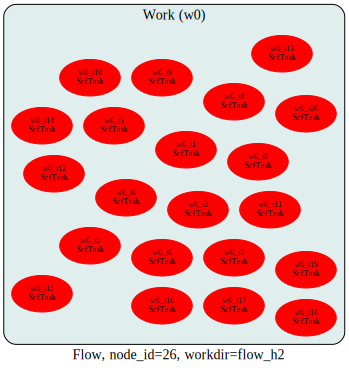

In [34]:
def build_flow(options):
    """
    Generate a flow to compute the total energy and forces for the H2 molecule in a big box
    as a function of the interatomic distance.

    Args:
        options: Command line options.

    Return:
        Flow object.
    """
    inputs = [gs_input(x=x) for x in np.linspace(0.5, 1.025, 21)]

    workdir = options.workdir if (options and options.workdir) else "flow_h2"

    return flowtk.Flow.from_inputs(workdir, inputs)
abilab.print_source(build_flow)
flow = build_flow(options=None)
flow.get_graphviz()

In [35]:
inputs = [task.input for task in flow.iflat_tasks()]

print("ecuts:\n", [inp["ecut"] for inp in inputs])

print("vols:\n", ["%.1f" % inp.structure.volume for inp in inputs])

def hh_dist(structure):
    return np.linalg.norm(structure.cart_coords[1] - structure.cart_coords[0])

from pprint import pprint
print("h-h [Ang]:\n", ["%.3f" % hh_dist(inp.structure) for inp in inputs])

ecuts:
 [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
vols:
 ['148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2', '148.2']
h-h [Ang]:
 ['0.529', '0.557', '0.585', '0.613', '0.640', '0.668', '0.696', '0.724', '0.751', '0.779', '0.807', '0.835', '0.863', '0.890', '0.918', '0.946', '0.974', '1.001', '1.029', '1.057', '1.085']


In [37]:
!wget https://raw.githubusercontent.com/abinit/pseudo_dojo/4048962957711c04281ffe6c2bd2c96f0f7110aa/pseudo_dojo/integration_tests/scheduler.yml

--2024-03-22 05:15:35--  https://raw.githubusercontent.com/abinit/pseudo_dojo/4048962957711c04281ffe6c2bd2c96f0f7110aa/pseudo_dojo/integration_tests/scheduler.yml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 800 [text/plain]
Saving to: ‘scheduler.yml’

scheduler.yml       100%[===================>]     800  --.-KB/s    in 0s      

2024-03-22 05:15:35 (39.2 MB/s) - ‘scheduler.yml’ saved [800/800]



In [ ]:
flow.make_scheduler().start()

Using scheduler v >= 3.0.0



Work #0: <Work, node_id=27, workdir=flow_h2/w0>, Finalized=False
+--------+-------------+------------+--------------+------------+---------+-----------------+----------+-----------+
| Task   | Status      | Queue      | MPI|Omp|Gb   | Warn|Com   | Class   | Sub|Rest|Corr   | Time     |   Node_ID |
+========+=============+============+==============+============+=========+=================+==========+===========+
| w0_t0  | AbiCritical | 5239@abitu | 1|  1|2.0    | 2|  0      | ScfTask | (0, 0, 0)       | 0:00:10Q |        28 |
+--------+-------------+------------+--------------+------------+---------+-----------------+----------+-----------+
| w0_t1  | AbiCritical | 5253@abitu | 1|  1|2.0    | 2|  0      | ScfTask | (0, 0, 0)       | 0:00:09Q |        29 |
+--------+-------------+------------+--------------+------------+---------+-----------------+----------+-----------+
| w0_t2  | AbiCritical | 5263@abitu | 1|  1|2.0    | 2|  0      | ScfTask | (0, 0, 0)       | 0:00:09Q |        30 